In [1]:
import psycopg2, re, time
import transformation as tns

In [2]:
def connect(create_file, query_file = 'query1.sql', to_transform = False):
    conn = None
    print('Connecting to the PostgreSQL database...')
    conn = psycopg2.connect(
        host="localhost",
        database="cs5421_project",
        user="postgres",
        password="156110jiao@!")# Change the database name & credentials accordingly!

    cur = conn.cursor()


    start = time.time()
    try:
        tns.executeScriptsFromFile(create_file, cur)
        tns.executeScriptsFromFile(query_file, cur)
        conn.commit()
        print('=========')
        end = time.time()
        delta = end - start
        print(f'{create_file} excuted')
        print('delta:', delta)
        print('=========')
    except (Exception, psycopg2.DatabaseError) as error:
        print('=========')
        end = time.time()
        delta = end - start
        print(f'{create_file} excuted')
        print('delta:', delta)
        print('=========')
        print(error)
    finally:
        if conn is not None:
            conn.close()
            print('Database connection closed.')
        return delta

In [3]:
# conn = psycopg2.connect(
#         host="localhost",
#         database="cs5421_project",
#         user="postgres",
#         password="156110jiao@!")
# cur = conn.cursor()
# # print(cur.execute("select exists(select relname from pg_class where relname='" + 'employees' + "')"))
# cur.execute('''SELECT * FROM employees;''')
# print(cur.fetchmany(size=10))
# # print(cur.fetchall())
# # a = cur.fetchone()
# # df = pd.read_sql_query('SELECT * FROM employees;"',con=conn)
# conn.close()

In [4]:
# connect("create_table.sql", query_file = 'query0.sql')

In [5]:
check_list = []
trigger_list = []

In [6]:
# query1 with CheckViolation
connect("create_table.sql")

Connecting to the PostgreSQL database...
create_table.sql excuted
delta: 0.008733034133911133
new row for relation "employees" violates check constraint "employees_birth_date_check"
DETAIL:  Failing row contains (1, John, Doe, 1872-01-01, 2015-07-01, 3000).

Database connection closed.


0.008733034133911133

In [7]:
# query1 with CheckViolation
connect("create_table_transformed.sql")

Connecting to the PostgreSQL database...
create_table_transformed.sql excuted
delta: 0.011632919311523438
Invalid birth_date in employees
CONTEXT:  PL/pgSQL function verify_employees_birth_date() line 6 at RAISE

Database connection closed.


0.011632919311523438

In [8]:
# 100 rows
check_list.append(connect("create_table.sql", query_file = 'query2.sql'))

Connecting to the PostgreSQL database...
create_table.sql excuted
delta: 0.014194250106811523
Database connection closed.


In [9]:
# 100 rows
trigger_list.append(connect("create_table_transformed.sql", query_file = 'query2.sql'))

Connecting to the PostgreSQL database...
create_table_transformed.sql excuted
delta: 0.022228002548217773
Database connection closed.


In [10]:
# 1000 rows
check_list.append(connect("create_table.sql", query_file = 'query3.sql'))

Connecting to the PostgreSQL database...
create_table.sql excuted
delta: 0.053679704666137695
Database connection closed.


In [11]:
# 1000 rows
trigger_list.append(connect("create_table_transformed.sql", query_file = 'query3.sql'))

Connecting to the PostgreSQL database...
create_table_transformed.sql excuted
delta: 0.05466580390930176
Database connection closed.


In [12]:
# 10000 rows
check_list.append(connect("create_table.sql", query_file = 'query4.sql'))

Connecting to the PostgreSQL database...
create_table.sql excuted
delta: 0.4183518886566162
Database connection closed.


In [ ]:
# 10000 rows
trigger_list.append(connect("create_table_transformed.sql", query_file = 'query4.sql'))

In [ ]:
# 100000 rows
check_list.append(connect("create_table.sql", query_file = 'query5.sql'))

In [ ]:
# 100000 rows
trigger_list.append(connect("create_table_transformed.sql", query_file = 'query5.sql'))

In [ ]:
import matplotlib.pyplot as plt
row_nums = [0,1,2,3]


plt.plot(row_nums, [c*1000 for c in check_list], label = "check")
plt.plot(row_nums, [t*1000 for t in trigger_list], label = "trigger")
plt.xticks(row_nums, ['100', '1000', '10000', '100000'])
plt.xlabel('number of rows')
plt.ylabel('delta t (ms)')
plt.legend()
plt.show()

Connecting to the PostgreSQL database...
create_table_transformed.sql excuted
delta: 0.3866758346557617
Database connection closed.


In [14]:
# 100000 rows
check_list.append(connect("create_table.sql", query_file = 'query5.sql'))

Connecting to the PostgreSQL database...
create_table.sql excuted
delta: 4.040996074676514
Database connection closed.


In [15]:
# 100000 rows
trigger_list.append(connect("create_table_transformed.sql", query_file = 'query5.sql'))

Connecting to the PostgreSQL database...
create_table_transformed.sql excuted
delta: 3.908684015274048
Database connection closed.


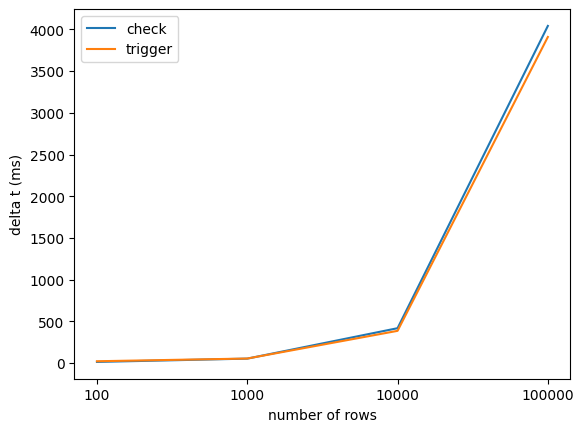

In [25]:
import matplotlib.pyplot as plt
row_nums = [0,1,2,3]


plt.plot(row_nums, [c*1000 for c in check_list], label = "check")
plt.plot(row_nums, [t*1000 for t in trigger_list], label = "trigger")
plt.xticks(row_nums, ['100', '1000', '10000', '100000'])
plt.xlabel('number of rows')
plt.ylabel('delta t (ms)')
plt.legend()
plt.show()